In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
file1 = '../../data/db_preprocessed.csv'
df = pd.read_csv(file1)
pd.set_option('display.max_columns', None)
df.head()

C:\Users\benva\AppData\Local\Temp\ipykernel_8028\3322652782.py:2: DtypeWarning: Columns (32,33,34,48,60,61,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file1)


,eventid,begin_date,end_date,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,alternative_txt,multiple,success,suicide,targsubtype1_txt,corp1,natlty1_txt,targsubtype2_txt,corp2,natlty2_txt,targsubtype3_txt,corp3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claim2,claim3,compclaim,weapsubtype1_txt,weapsubtype2,weapsubtype2_txt,weapsubtype3_txt,weapsubtype4_txt,nkill,nkillter,nwound,nwoundte,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome_txt,nreleased,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,weapon_biological,weapon_chemical,weapon_radiological,weapon_nuclear,weapon_firearms,weapon_explosives,weapon_fake weapons,weapon_incendiary,weapon_melee,weapon_vehicle,weapon_sabotage equipment,weapon_other,weapon_unknown,attack_assassination,attack_armed assault,attack_bombing/explosion,attack_hijacking,attack_hostage taking (barricade incident),attack_hostage taking (kidnapping),attack_facility/infrastructure attack,attack_unarmed assault,attack_unknown,target_business,target_government (general),target_police,target_military,target_abortion related,target_airports & aircraft,target_government (diplomatic),target_educational institution,target_food or water supply,target_journalists & media,target_maritime,target_ngo,target_other,target_private citizens & property,target_religious figures/institutions,target_telecommunication,claim_letter,claim_post-incident_call,claim_pre-incident_call,claim_email,claim_left_note,claim_video,claim_social-media-blog,claim_personal_claim,claim_other
0,202101010004,2021-01-01,2021-01-01,Egypt,Middle East & North Africa,North Sinai,Beir al-Abd,31.016779,33.008587,1.0,0,01/01/2021: An explosive device detonated targ...,1,1,0,1,Insurgency/Guerilla Action,0.0,1,0,Military Transportation/Vehicle (excluding con...,Egyptian Armed Forces,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,NaN,NaN,NaN,Remote Trigger,NaN,NaN,NaN,NaN,2.0,0.0,5.0,0.0,Unknown,NaN,Vehicle damaged,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,202101010005,2021-01-01,2021-01-01,India,South Asia,Jammu and Kashmir,Pampore,34.010230,74.917261,1.0,0,01/01/2021: Assailants threw a grenade at a Ce...,1,1,1,0,NaN,0.0,1,0,"Police Building (headquarters, station, school)",Central Reserve Police Force (CRPF),India,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,NaN,NaN,NaN,Grenade,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,202101010006,2021-01-01,2021-01-01,Yemen,Middle East & North Africa,Al Hudaydah,Hudaydah,14.782391,42.973093,1.0,1,01/01/2021: Assailants launched an artillery s...,1,1,1,1,State Actors,0.0,1,0,"Procession/Gathering (funeral, wedding, birthd...",Almansour Wedding Hall,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,-99.0,0.0,NaN,NaN,NaN,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,Minor (likely < $1 million),NaN,Building damaged,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,START Primary Collection,0,0,0,0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,202101010009,2021-01-01,2021-01-01,Afghanistan,South Asia,Ghor,Feroz Koh,34.521315,65.249242,1.0,1,01/01/2021: Assailants opened fire on the vehi...,1,1,1,1,State Actors,0.0,1,0,Radio Journalist/Staff/Facility,Sadai Ghor Radio,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,N

In [3]:
def tetracoric(a,b):
    tab = pd.crosstab(a,b)
    val_a = tab[0][0]
    val_b = tab[1][0]
    val_c = tab[0][1]
    val_d = tab[1][1]

    v = val_a*val_d/val_b/val_c
    return math.cos(math.pi/(1+math.sqrt(v)))
df.loc(df.columns.dtype == 'boolean')

df = df[['vicinity', 'crit1', 'crit2', 'crit3','doubtterr', 'multiple','success', 'suicide','ishostkid', "attack_assassination", "attack_armed assault", "attack_bombing/explosion", "attack_hijacking", "attack_hostage taking (barricade incident)", "attack_hostage taking (kidnapping)", "attack_unarmed assault", "attack_facility/infrastructure attack", 
            "target_business", "target_government (general)", "target_police", "target_military", "target_abortion related", "target_airports & aircraft", "target_government (diplomatic)", "target_educational institution","target_food or water supply", "target_journalists & media", "target_maritime", "target_ngo", "target_other", "target_private citizens & property", "target_religious figures/institutions", "target_telecommunication", 
            'claim_letter',
            'claim_post-incident_call',
            'claim_pre-incident_call',
            'claim_email',
            'claim_left_note',
            'claim_video',
            'claim_social-media-blog',
            'claim_personal_claim',
            'claim_other', 'success', 'suicide' ]]

corr = df.corr(numeric_only=True, method=tetracoric)

C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8028\1037727701.py:8

In [4]:
corr

,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,ishostkid,attack_assassination,attack_armed assault,attack_bombing/explosion,attack_hijacking,attack_hostage taking (barricade incident),attack_hostage taking (kidnapping),attack_unarmed assault,attack_facility/infrastructure attack,target_business,target_government (general),target_police,target_military,target_abortion related,target_airports & aircraft,target_government (diplomatic),target_educational institution,target_food or water supply,target_journalists & media,target_maritime,target_ngo,target_other,target_private citizens & property,target_religious figures/institutions,target_telecommunication,claim_letter,claim_post-incident_call,claim_pre-incident_call,claim_email,claim_left_note,claim_video,claim_social-media-blog,claim_personal_claim,claim_other,success,suicide
vicinity,1.000000,0.064751,0.017396,-0.224020,0.197764,-0.052799,-0.014115,0.050526,0.066831,-0.207872,0.123214,-0.009520,0.226728,-0.217692,0.085559,-0.024672,-0.073823,-0.202375,-0.194059,-0.042214,0.242010,-0.841103,-0.044896,-0.098803,-0.122794,0.287018,-0.311476,0.414612,0.158551,0.104026,-0.057926,-0.218064,-0.090198,0.033356,0.068520,-0.331560,0.024937,0.163432,0.125210,0.041337,-0.002303,0.217572,-0.014115,0.050526
crit1,0.064751,1.000000,-1.000000,-1.000000,-0.995378,0.458840,-0.129695,0.692899,-0.268640,-0.496301,-0.195137,0.609834,-0.101836,-0.190058,-0.267423,-0.343645,0.028568,0.081953,-0.003884,0.224704,0.836676,1.000000,0.463803,0.327808,0.136029,0.529330,-0.428396,-0.073898,0.109806,0.145635,-0.441307,0.048634,0.583259,-0.128082,0.533432,0.057992,0.574909,0.198573,0.114276,0.679821,0.341818,0.595953,-0.129695,0.692899
crit2,0.017396,-1.000000,1.000000,-1.000000,-0.996485,0.175484,-0.260693,-0.083362,0.002580,-0.380197,-0.089199,0.328705,1.000000,-0.592430,-0.013742,0.028051,0.370190,0.302874,0.609300,0.861126,0.883142,1.000000,0.134683,0.873389,0.603598,0.341137,0.606591,1.000000,0.687857,1.000000,0.134031,0.469555,1.000000,0.339224,0.512398,1.000000,0.489315,0.131024,0.087387,-0.163583,0.272623,0.173438,-0.260693,-0.083362
crit3,-0.224020,-1.000000,-1.000000,1.000000,-0.999879,0.114222,0.016337,-0.120622,0.446434,0.335279,-0.353337,0.168335,0.699862,0.647522,0.425627,0.256080,0.657186,0.992330,0.971100,0.873261,-0.999912,1.000000,1.000000,0.967247,0.989131,1.000000,1.000000,1.000000,1.000000,1.000000,0.977525,0.989609,1.000000,0.753400,-0.058237,0.730437,-0.324617,0.652121,-0.194204,-0.269128,-0.259231,0.304971,0.016337,-0.120622
doubtterr,0.197764,-0.995378,-0.996485,-0.999879,1.000000,-0.167795,0.033935,0.049991,-0.258324,-0.126190,0.339909,-0.239223,-0.401019,-0.304122,-0.237109,-0.040525,-0.445168,-0.647013,-0.668045,-0.711058,0.959604,-0.778311,-0.640764,-0.698954,-0.643201,-0.694900,-0.456405,-0.646745,-0.472432,-0.628849,-0.586280,-0.635443,-0.853693,-0.428249,0.014400,-0.422112,0.232982,-0.560625,0.116874,0.173959,0.169043,-0.133747,0.033935,0.049991
multiple,-0.052799,0.458840,0.175484,0.114222,-0.167795,1.000000,0.066175,0.122049,-0.166287,-0.620572,-0.107986,0.156191,-0.133261,-0.104188,-0.157599,0.067376,0.341922,0.046952,-0.161668,-0.063634,-0.084569,0.072258,-0.270740,-0.307364,0.019409,0.045550,-0.373141,-0.260537,-0.398105,0.412120,0.103923,0.033349,0.395122,0.290714,0.185282,0.453966,0.296838,0.290128,0.145498,0.381572,0.268378,0.150538,0.066175,0.122049
success,-0.014115,-0.129695,-0.260693,0.016337,0.033935,0.066175,1.000000,-0.158630,0.793197,-0.417644,0.319962,-0.062883,0.041151,0.766101,0.635478,-0.048437,0.398469,0.248070,-0.169416,0.115592,0.003801,-0.142718,-0.183888,-0.148299,0.119617,0.093642,0.007623,-0.064151,0.279753,0.096868,0.298636,0.168557,0.329038,-0.066806,0.288903,-0.329117,0.197996,-0.076094,0.469462,0.155346,0.003914,0.171463,1.000000,-0.158630
suicide,0.050526,0.692899,-0.083362,-0.120622,0.049991,0.122049,-0.158630,1.000000,-0.592687,-0.374598,-0.419048,0.845035,-0.355393,0.182525,-0.772096,-0.859703,-0.913355,-0.190695,-0.010237,0.177

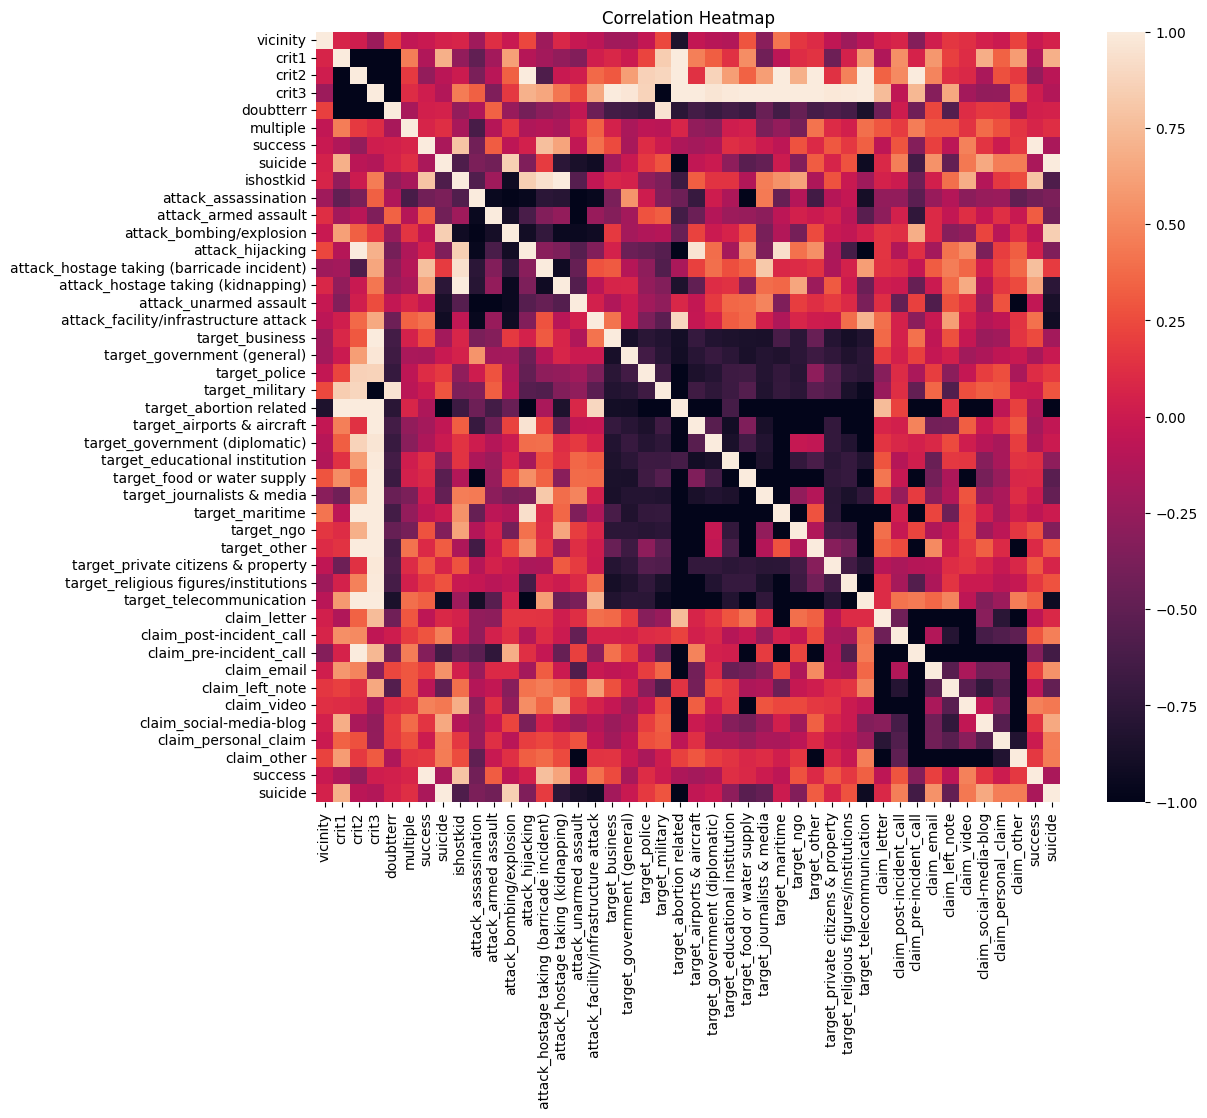

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
corr['vicinity']['success'].abs()

success    0.014115
success    0.014115
Name: vicinity, dtype: float64

In [7]:
correlated_variable = []
for variable1 in corr.columns:
    for variable2 in corr.columns:
        if variable1 in corr and variable2 in corr[variable1]:
            correlation = corr[variable1][variable2]
            if isinstance(correlation, float):
                if (correlation > 0.75 or correlation < -0.75) and correlation != 1 and correlation!= -1:
                    # print(correlation)
                    correlated_variable.append((variable1, variable2, float(correlation)))


for correlated in correlated_variable:
    print(correlated)

('vicinity', 'target_abortion related', -0.8411027282265827)
('crit1', 'doubtterr', -0.9953777276899237)
('crit1', 'target_military', 0.83667622643216)
('crit2', 'doubtterr', -0.996484573523695)
('crit2', 'target_police', 0.8611257815652281)
('crit2', 'target_military', 0.8831421789435835)
('crit2', 'target_government (diplomatic)', 0.8733887392399486)
('crit3', 'doubtterr', -0.9998793100894803)
('crit3', 'target_business', 0.9923301885596513)
('crit3', 'target_government (general)', 0.9710997684045627)
('crit3', 'target_police', 0.8732606433807394)
('crit3', 'target_military', -0.9999115686570469)
('crit3', 'target_government (diplomatic)', 0.9672474956014021)
('crit3', 'target_educational institution', 0.9891308596696923)
('crit3', 'target_private citizens & property', 0.9775248040992295)
('crit3', 'target_religious figures/institutions', 0.9896092644108035)
('crit3', 'claim_letter', 0.7534002186001256)
('doubtterr', 'crit1', -0.9953777276899237)
('doubtterr', 'crit2', -0.99648457352